<a href="https://colab.research.google.com/github/rncebranco/ufpa_ficcd_2025/blob/main/FICCD_Claudomiro_ativ_03_sampleEsampling_dist_TLC_Pvalue_Raimunda_Branco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fundamentos de Inteligência Computacional e Ciência de Dados**

**Professor: Claudomiro Sales**

**Aluna: Raimunda Branco - 202499980055**

**[Atividade 3 - Sample distribution and sampling distribution; TLC; P-value
](https://docs.google.com/presentation/d/1zh0UjR8sV5qpoNtsAuk1Bna9bKf29pDLQSvPXwLH3zs/edit#slide=id.g34faa5b7be5_0_0)**

**Belém, 05 de maio de 2025.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install numpy; matplotlib; pandas; seaborn; kagglehub; scipy

/bin/bash: line 1: matplotlib: command not found
/bin/bash: line 1: pandas: command not found
/bin/bash: line 1: seaborn: command not found
/bin/bash: line 1: kagglehub: command not found
/bin/bash: line 1: scipy: command not found


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import kagglehub as kh
from scipy.stats import norm, gamma
import math

#####**A) A: sample distribution and sampling distribution**

A partir do que foi feito na Atividade 2 “Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho”, crie  uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.

Contexto do **[Dataset](https://www.kaggle.com/datasets/shubhamgupta012/forest-soil-characteristics-dataset)**:

About Dataset

This dataset provides a comprehensive collection of forest soil characteristics, including various parameters and measurements. It contains data from different sites, each identified by a unique site code. The dataset includes information such as HouseID, REP# (replicate number), CoreID (core identification), Depth (depth range), LU_Current (current land use), LU_Previous (previous land use), Yr_Built (year built), Lawn Age, CoarseVeg (coarse vegetation), StructDen (structural density), BD (bulk density), N_Perc (nitrogen percentage), C_Perc (carbon percentage), C_N (carbon to nitrogen ratio), N_gm2 (nitrogen content in grams per square meter), C_gm2 (carbon content in grams per square meter), Sand_Perc (percentage of sand), Clay_Perc (percentage of clay), Silt_Perc (percentage of silt), MB Carbon (microbial biomass carbon), Respiration, Initial NO3 (+NO2) (initial nitrate and nitrite content), Initial NH4 (initial ammonium content), MBN (microbial biomass nitrogen), Net N Min (net nitrogen mineralization), and Net Nitr (net nitrification).

This dataset serves as a valuable resource for researchers, ecologists, and environmental scientists interested in studying forest soil characteristics and their impact on ecosystem dynamics. It can be used for various purposes, such as analyzing nutrient cycling, evaluating soil quality, and understanding the effects of land use changes on soil properties. The dataset provides a rich source of information that can contribute to a better understanding of forest ecosystems and support evidence-based decision-making in forestry and land management practices.

In [44]:
# Dataset from Kaggle
path = kh.dataset_download('shubhamgupta012/forest-soil-characteristics-dataset')
print('Path to dataset files:', path)

data_soil = pd.read_csv(path + '/Raciti2011_from author.csv')
data_soil['BD'] = pd.to_numeric(data_soil['BD'])
data_soil['BD'] = data_soil['BD'].fillna(0)
data_soil.head()

Path to dataset files: /kaggle/input/forest-soil-characteristics-dataset


,Site,HouseID,REP#,CoreID,Depth,LU_Current,LU_Previous,Yr_Built,Lawn Age,CoarseVeg,...,Sand_Perc,Clay_Perc,Silt_Perc,MB Carbon,Respiration,Initial NO3 (+NO2),Initial NH4,MBN,Net N Min,Net Nitr
0,Hillsdale 1,NaN,1,Hillsdale 1_1,0to10,Forest,NaN,NaN,NaN,NaN,...,20.9,13.5,65.6,248.0056495,5.843,0.277,10.297,65.433,0.417,0.070
1,Hillsdale 2,NaN,1,Hillsdale 2_1,0to10,Forest,NaN,NaN,NaN,NaN,...,33.9,12.2,53.9,461.5742368,8.219,9.164,7.807,95.314,0.386,0.351
2,Leakin 1,NaN,1,Leakin 1_1,0to10,Forest,NaN,NaN,NaN,NaN,...,38.3,14.0,47.6,414.5008999,5.853,9.069,0.819,65.638,0.180,0.186
3,Leakin 2,NaN,1,Leakin 2 _1,0to10,Forest,NaN,NaN,NaN,NaN,...,60.5,10.5,29.0,797.7840349,19.719,0.266,5.645,55.820,0.570,0.000
4,Oregon Ridge Mid 1,NaN,1,Oregon Ridge Mid 1_1,0to10,Forest,NaN,NaN,NaN,NaN,...,54.3,11.7,33.9,124.1263228,3.632,0.708,12.389,118.211,0.769,0.062


Population REAL Mean (μ): 1.08
Population REAL Std Dev (σ): 0.26


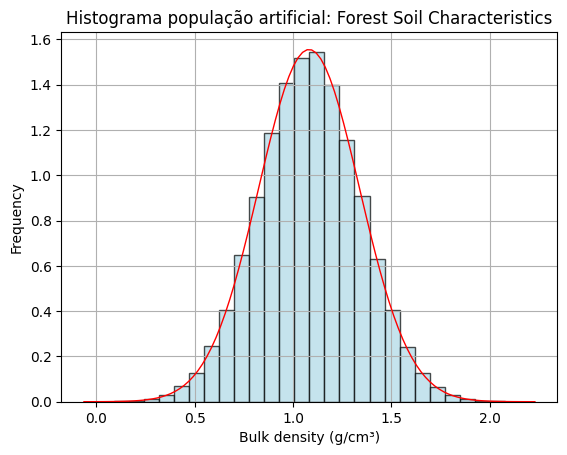

In [45]:
# Create histogram using Matplotlib:

# Calculate real mean and real standart deviation
population_mean = data_soil['BD'].mean()
population_std = data_soil['BD'].std()
print(f'Population REAL Mean (μ): {population_mean:.2f}')
print(f'Population REAL Std Dev (σ): {population_std:.2f}')

# População artificial dessa variável com uma distribuição Gaussiana
np.random.seed(42)
population = np.random.normal(loc=population_mean, scale=population_std, size=100000)

# Create histogram
plt.hist(population, color='lightblue', bins=30, edgecolor='black', density=True, alpha=0.7)
plt.title('Histograma população artificial: Forest Soil Characteristics')
plt.xlabel('Bulk density (g/cm³)')
plt.ylabel('Frequency')

# Curva normal
# 100 pontos entre os limites
x = np.linspace(min(population), max(population), 100)
# Calcula os valores da PDF da normal para cada ponto x
p = norm.pdf(x, loc=population_mean, scale=population_std)
# Plotar a curva normal
plt.plot(x, p, color='red', linewidth=1, label='Distribuição Normal')

plt.grid(True)
plt.show()

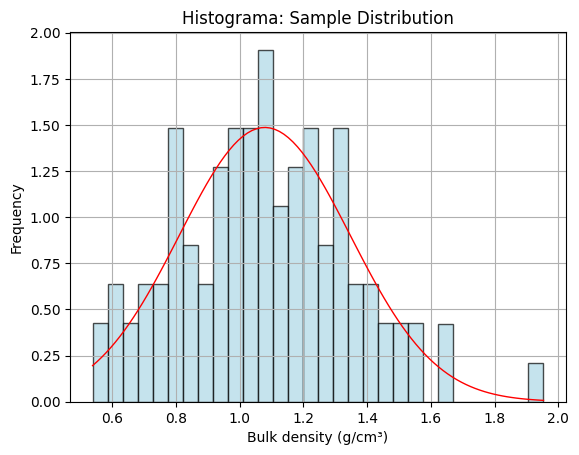

In [46]:
# SAMPLE distribuition
sample_dist = np.random.choice(population, size=100, replace=False)

# Plotar o histograma
plt.hist(sample_dist, color='lightblue', bins=30, edgecolor='black', density=True, alpha=0.7)
plt.title('Histograma: Sample Distribution')
plt.xlabel('Bulk density (g/cm³)')
plt.ylabel('Frequency')

# Curva normal
mean = sample_dist.mean()
std = sample_dist.std()
# 100 pontos entre os limites
x = np.linspace(min(sample_dist), max(sample_dist), 100)
# Calcula os valores da PDF da normal para cada ponto x
p = norm.pdf(x, loc=mean, scale=std)
# Plotar a curva normal
plt.plot(x, p, color='red', linewidth=1, label='Distribuição Normal')

plt.grid(True)
plt.show()

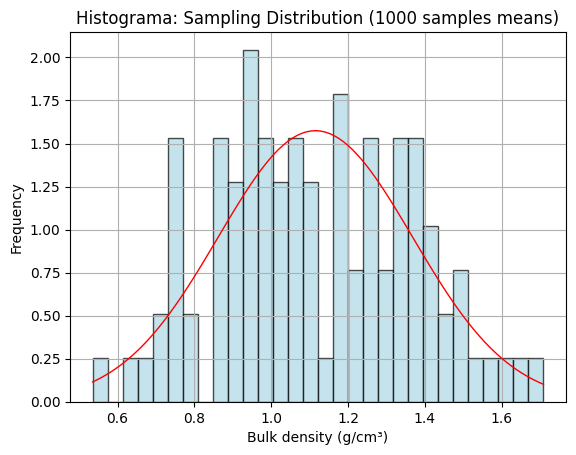

In [47]:
# SAMPLING distribuition

sample_means = []
for x in range(1000):
  sample_dist = np.random.choice(population, size=100, replace=False)
  sample_means.append(sample_dist.mean())

# Plotar o histograma
plt.hist(sample_dist, color='lightblue', bins=30, edgecolor='black', density=True, alpha=0.7)
plt.title('Histograma: Sampling Distribution (1000 samples means)')
plt.xlabel('Bulk density (g/cm³)')
plt.ylabel('Frequency')

# Curva normal
mean = sample_dist.mean()
std = sample_dist.std()
# 100 pontos entre os limites
x = np.linspace(min(sample_dist), max(sample_dist), 100)
# Calcula os valores da PDF da normal para cada ponto x
p = norm.pdf(x, loc=mean, scale=std)
# Plotar a curva normal
plt.plot(x, p, color='red', linewidth=1, label='Distribuição Normal')

plt.grid(True)
plt.show()

Qual a probabilidade de uma amostra de solo de n=100 tenha uma média de BD maior que determinado valor de p?

In [52]:
sampling_mean = np.mean(sample_means)
sampling_std = np.std(sample_means)

p = population_mean

# Probabilidade de obter média BD > p
probabilidade = 1 - norm.cdf(p, loc=sampling_mean, scale=sampling_std)
print(f'Probabilidade de média BD > {p:.2f}: {probabilidade*100:.2f}%')

# Probabilidade de obter média BD < p
probabilidade = norm.cdf(p, loc=sampling_mean, scale=sampling_std)
print(f'Probabilidade de média BD < {p:.2f}: {probabilidade*100:.2f}%')

Probabilidade de média BD > 1.08: 48.98%
Probabilidade de média BD < 1.08: 51.02%


#####**B) A: TLC**

Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.